# Europe1k output processing

This notebooks contains code to process some of the model evaluation of PCR-GLOBWB at various spatial resolutions. We show, where available, output at the new 1k resolution as well as 10k resolution with new parameterization and current 'default' 10k resolution with model settings from GMD paper.

Currently, output is evaluated for two basins:
1. [Elbe](#Elbe): here we have output for all three model runs;
2. [Ebro](#Ebro): here only the new 1k and the GMD 10k runs are available;
3. [Po](#Po): idem;
4. [Dnieper](#Dnieper): both new 1k and GMD 10k available besides for GRACE evaluation as model did not progress far enough yet.

Three output variables are evaluated:
1. Evaporation: we here use [GLEAM data](https://www.gleam.eu/) as benchmark of our model results;
2. Terrestrial water storage (TWS): TWS anomalies as observed by the [GRACE/GRACE-FO mission](https://gracefo.jpl.nasa.gov/) are used to evaluate model output;
3. Discharge: simulated monthly average discharge is compared with observations from [GRDC](https://portal.grdc.bafg.de/).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<a id='Elbe'></a>

# Elbe

## GLEAM

In [2]:
# paths to model output data (includes observations already as well)
GLEAM_10k_GMD_fo = 'output/Elbe/evaluated_timeseries_GLEAM_10k_GMD.csv'
GLEAM_10k_fo = 'output/Elbe/evaluated_timeseries_GLEAM_10k.csv'
GLEAM_1k_fo =  'output/Elbe/evaluated_timeseries_GLEAM_1k.csv'

In [3]:
# load data
GLEAM_10k_GMD = pd.read_csv(GLEAM_10k_GMD_fo, index_col=0)
GLEAM_10k = pd.read_csv(GLEAM_10k_fo, index_col=0)
GLEAM_1k  = pd.read_csv(GLEAM_1k_fo, index_col=0)

In [4]:
# remove missing values
GLEAM_10k_GMD = GLEAM_10k_GMD.dropna()
GLEAM_10k = GLEAM_10k.dropna()
GLEAM_1k = GLEAM_1k.dropna()

In [5]:
# set index
GLEAM_10k_GMD.set_index(pd.to_datetime(GLEAM_10k_GMD.index), inplace=True)
GLEAM_10k.set_index(pd.to_datetime(GLEAM_10k.index), inplace=True)
GLEAM_1k.set_index(pd.to_datetime(GLEAM_1k.index), inplace=True)

In [6]:
# give columns a more meaningful name
GLEAM_10k_GMD = GLEAM_10k_GMD.rename(columns={'E':'GLEAM', 'total_evaporation': 'PCR-GLOBWB'})

In [7]:
# check overall first and last timestep of data
idx_min = min(GLEAM_10k_GMD.index.values.min(), GLEAM_10k.index.values.min(), GLEAM_1k.index.values.min())
idx_max = min(GLEAM_10k_GMD.index.values.max(), GLEAM_10k.index.values.max(), GLEAM_1k.index.values.max())

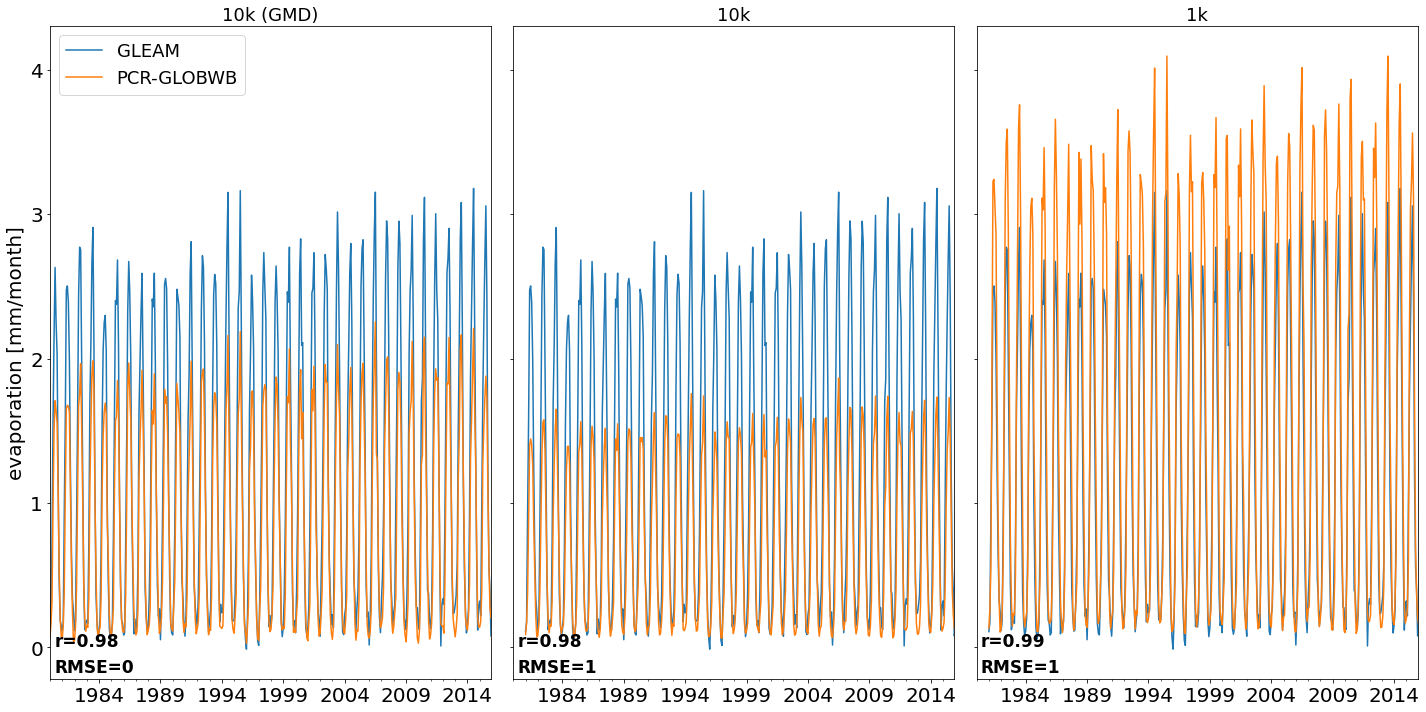

In [8]:
#plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10), sharey=True)

GLEAM_10k_GMD.plot(ax=ax1)
GLEAM_10k.plot(ax=ax2, legend=None)
GLEAM_1k.plot(ax=ax3, legend=None)

ax1.legend(loc="upper left", fontsize=18)

ax1.set_title('10k (GMD)', fontsize=18)
ax2.set_title('10k', fontsize=18)
ax3.set_title('1k', fontsize=18)

ax1.set_ylabel('evaporation [mm/month]', fontsize=20)

for ax, r, rmse in zip([ax1, ax2, ax3], [0.98, 0.98, 0.99], [0, 1, 1]):
    ax.set_xlim(idx_min, idx_max)
    ax.tick_params(labelsize=20)
    ax.text(0.01, 0.05, 'r={}'.format(r), fontsize=17, fontweight='bold', transform=ax.transAxes)
    ax.text(0.01, 0.01, 'RMSE={}'.format(rmse), fontsize=17, fontweight='bold', transform=ax.transAxes)

plt.tight_layout()

plt.savefig('figs/comparison_Elbe_GLEAM.png', dpi=300, bbox_inches='tight')

## GRACE

In [9]:
GRACE_10k_GMD_fo = 'output/Elbe/evaluated_timeseries_GRACE_10k_GMD.csv'
GRACE_10k_fo = 'output/Elbe/evaluated_timeseries_GRACE_10k.csv'
GRACE_1k_fo =  'output/Elbe/evaluated_timeseries_GRACE_1k.csv'

In [10]:
GRACE_10k_GMD = pd.read_csv(GRACE_10k_GMD_fo, index_col=0)
GRACE_10k = pd.read_csv(GRACE_10k_fo, index_col=0)
GRACE_1k  = pd.read_csv(GRACE_1k_fo, index_col=0)

In [11]:
GRACE_10k_GMD = GRACE_10k_GMD.dropna()
GRACE_10k = GRACE_10k.dropna()
GRACE_1k = GRACE_1k.dropna()

In [12]:
GRACE_10k_GMD.set_index(pd.to_datetime(GRACE_10k_GMD.index), inplace=True)
GRACE_10k.set_index(pd.to_datetime(GRACE_10k.index), inplace=True)
GRACE_1k.set_index(pd.to_datetime(GRACE_1k.index), inplace=True)

In [13]:
GRACE_10k_GMD = GRACE_10k_GMD.rename(columns={'lwe_thickness':'GRACE', 'total_thickness_of_water_storage': 'PCR-GLOBWB'})

In [14]:
idx_min = min(GRACE_10k_GMD.index.values.min(), GRACE_10k.index.values.min(), GRACE_1k.index.values.min())
idx_max = min(GRACE_10k_GMD.index.values.max(), GRACE_10k.index.values.max(), GRACE_1k.index.values.max())

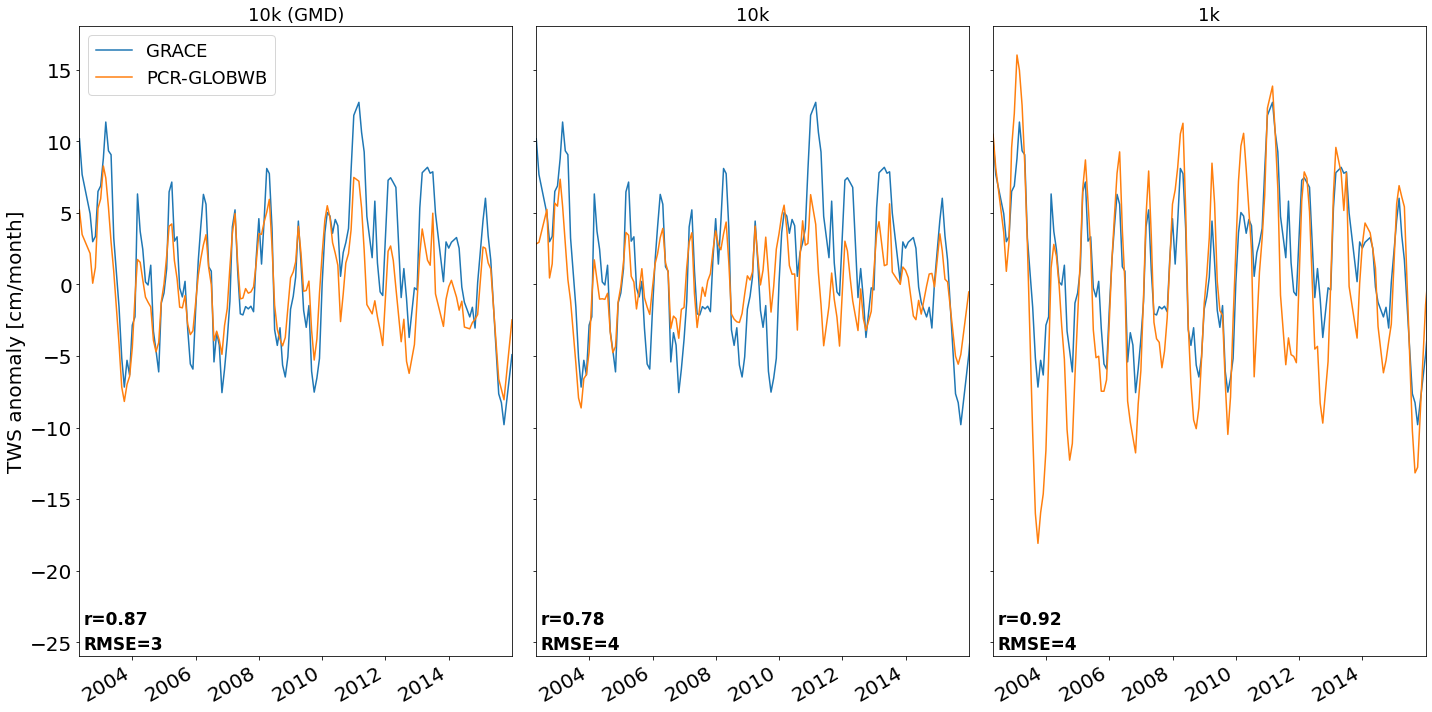

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10), sharey=True)

GRACE_10k_GMD.plot(ax=ax1)
GRACE_10k.plot(ax=ax2, legend=None)
GRACE_1k.plot(ax=ax3, legend=None)

ax1.set_ylabel('TWS anomaly [cm/month]', fontsize=20)

ax1.legend(loc="upper left", fontsize=18)

ax1.set_title('10k (GMD)', fontsize=18)
ax2.set_title('10k', fontsize=18)
ax3.set_title('1k', fontsize=18)

for ax, r, rmse in zip([ax1, ax2, ax3], [0.87, 0.78, 0.92], [3, 4, 4]):
    ax.set_xlim(idx_min, idx_max)
    ax.tick_params(labelsize=20)
    ax.text(0.01, 0.05, 'r={}'.format(r), fontsize=17, fontweight='bold', transform=ax.transAxes)
    ax.text(0.01, 0.01, 'RMSE={}'.format(rmse), fontsize=17, fontweight='bold', transform=ax.transAxes)

plt.tight_layout()

plt.savefig('figs/comparison_Elbe_GRACE.png', dpi=300, bbox_inches='tight')

## GRDC

In [16]:
GRDC_10k_GMD_fo = 'output/Elbe/evaluated_timeseries_GRDC_10k_GMD.csv'
GRDC_10k_fo = 'output/Elbe/evaluated_timeseries_GRDC_10k.csv'
GRDC_1k_fo =  'output/Elbe/evaluated_timeseries_GRDC_1k.csv'

In [17]:
GRDC_10k_GMD = pd.read_csv(GRDC_10k_GMD_fo, index_col=0)
GRDC_10k = pd.read_csv(GRDC_10k_fo, index_col=0)
GRDC_1k  = pd.read_csv(GRDC_1k_fo, index_col=0)

In [18]:
GRDC_1k = GRDC_1k.rename(columns={'Q$sim$ PCR-GLOBWB (1km)':'Q$sim$ PCR-GLOBWB (1k)'})

In [19]:
GRDC_1k['Q$sim$ PCR-GLOBWB (10k)'] = GRDC_10k['Q$sim$ PCR-GLOBWB (1km)']
GRDC_1k['Q$sim$ PCR-GLOBWB (10k GMD)'] = GRDC_10k_GMD['Q$sim$ PCR-GLOBWB (1km)']

In [20]:
GRDC_1k = GRDC_1k.dropna()

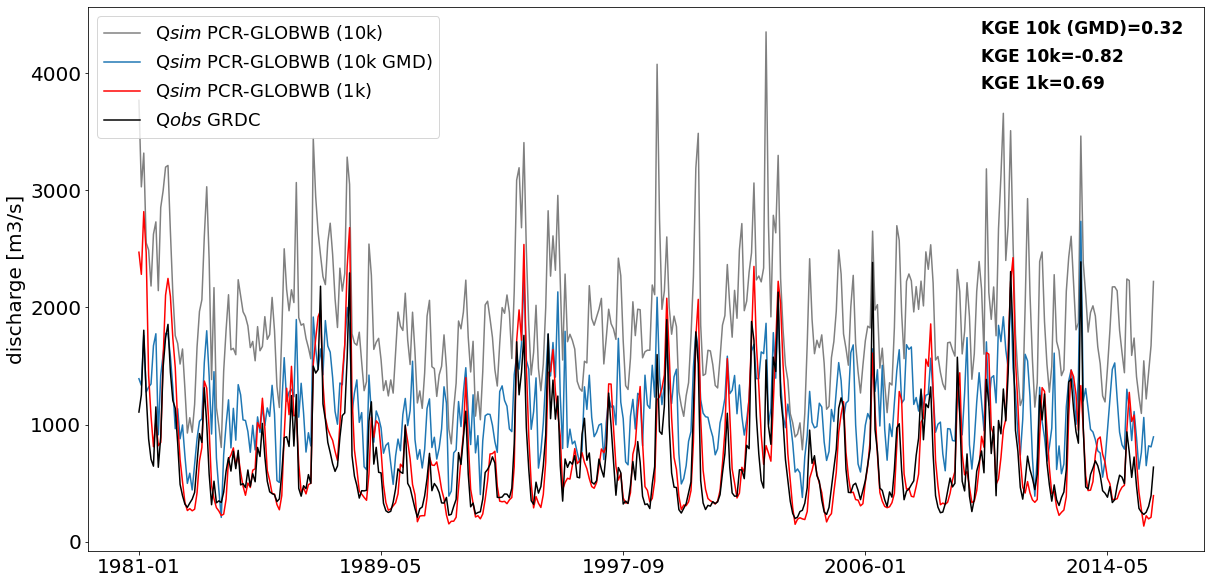

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
GRDC_1k['Q$sim$ PCR-GLOBWB (10k)'].plot(ax=ax, color='grey', legend=True)
GRDC_1k['Q$sim$ PCR-GLOBWB (10k GMD)'].plot(ax=ax, legend=True)
GRDC_1k['Q$sim$ PCR-GLOBWB (1k)'].plot(ax=ax, color='r', legend=True)
GRDC_1k['Q$obs$ GRDC'].plot(ax=ax, color='k', legend=True)

ax.set_ylabel('discharge [m3/s]', fontsize=20)

ax.legend(loc="upper left", fontsize=18)

ax.tick_params(labelsize=20)
    
ax.text(0.8, 0.95, 'KGE 10k (GMD)=0.32'.format(rmse), fontsize=17, fontweight='bold', transform=ax.transAxes)
ax.text(0.8, 0.9, 'KGE 10k=-0.82'.format(rmse), fontsize=17, fontweight='bold', transform=ax.transAxes)
ax.text(0.8, 0.85, 'KGE 1k=0.69'.format(rmse), fontsize=17, fontweight='bold', transform=ax.transAxes)
    
plt.savefig('figs/comparison_Elbe_GRDC.png', dpi=300, bbox_inches='tight')

<a id='Ebro'></a>

# Ebro

## GLEAM

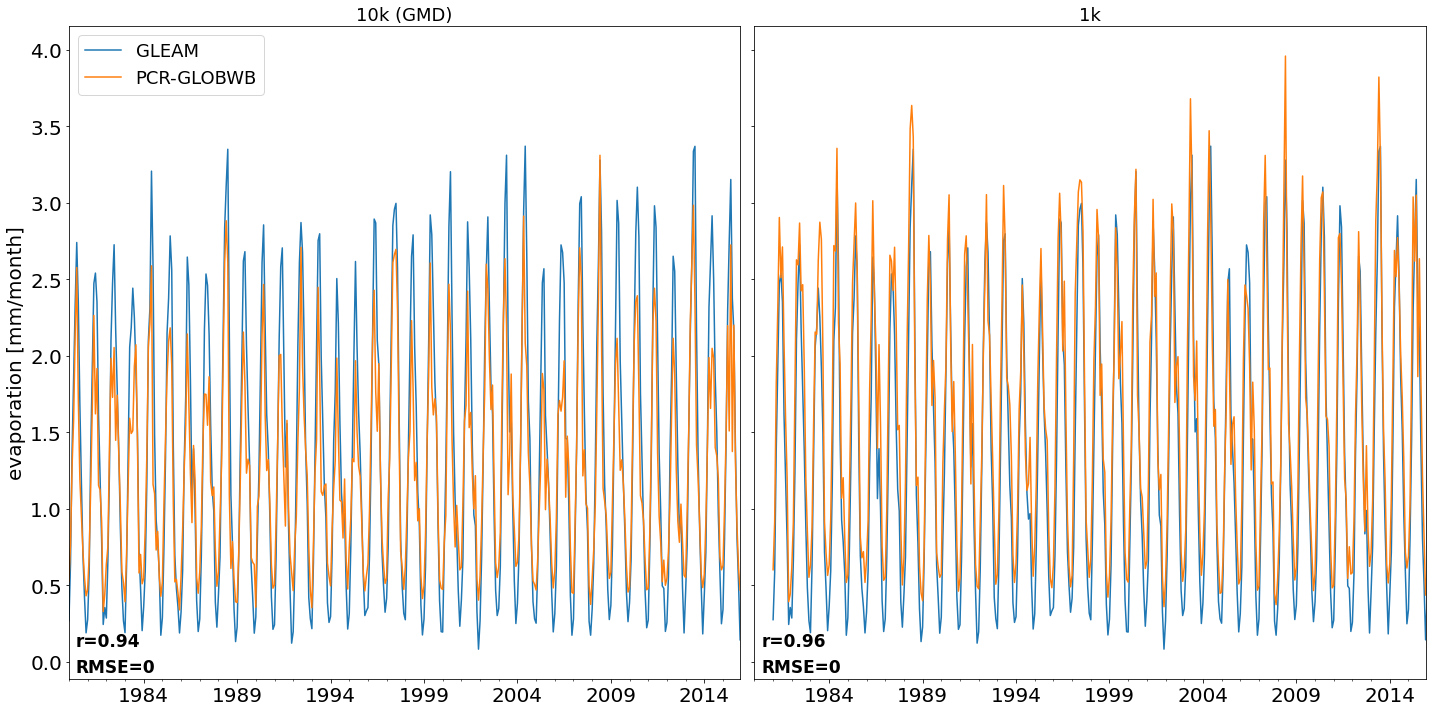

In [22]:
# paths to model output data (includes observations already as well)
GLEAM_10k_GMD_fo = 'output/Ebro/evaluated_timeseries_GLEAM_10k_GMD.csv'
GLEAM_1k_fo =  'output/Ebro/evaluated_timeseries_GLEAM_1k.csv'

# load data
GLEAM_10k_GMD = pd.read_csv(GLEAM_10k_GMD_fo, index_col=0)
GLEAM_1k  = pd.read_csv(GLEAM_1k_fo, index_col=0)

# remove missing values
GLEAM_10k_GMD = GLEAM_10k_GMD.dropna()
GLEAM_1k = GLEAM_1k.dropna()

# set index
GLEAM_10k_GMD.set_index(pd.to_datetime(GLEAM_10k_GMD.index), inplace=True)
GLEAM_1k.set_index(pd.to_datetime(GLEAM_1k.index), inplace=True)

# give columns a more meaningful name
GLEAM_10k_GMD = GLEAM_10k_GMD.rename(columns={'E':'GLEAM', 'total_evaporation': 'PCR-GLOBWB'})

# check overall first and last timestep of data
idx_min = min(GLEAM_10k_GMD.index.values.min(), GLEAM_1k.index.values.min())
idx_max = min(GLEAM_10k_GMD.index.values.max(), GLEAM_1k.index.values.max())

#plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

GLEAM_10k_GMD.plot(ax=ax1)
GLEAM_1k.plot(ax=ax2, legend=None)

ax1.legend(loc="upper left", fontsize=18)

ax1.set_title('10k (GMD)', fontsize=18)
ax2.set_title('1k', fontsize=18)

ax1.set_ylabel('evaporation [mm/month]', fontsize=20)

for ax, r, rmse in zip([ax1, ax2], [0.94, 0.96], [0, 0]):
    ax.set_xlim(idx_min, idx_max)
    ax.tick_params(labelsize=20)
    ax.text(0.01, 0.05, 'r={}'.format(r), fontsize=17, fontweight='bold', transform=ax.transAxes)
    ax.text(0.01, 0.01, 'RMSE={}'.format(rmse), fontsize=17, fontweight='bold', transform=ax.transAxes)

plt.tight_layout()

plt.savefig('figs/comparison_Ebro_GLEAM.png', dpi=300, bbox_inches='tight')

## GRACE

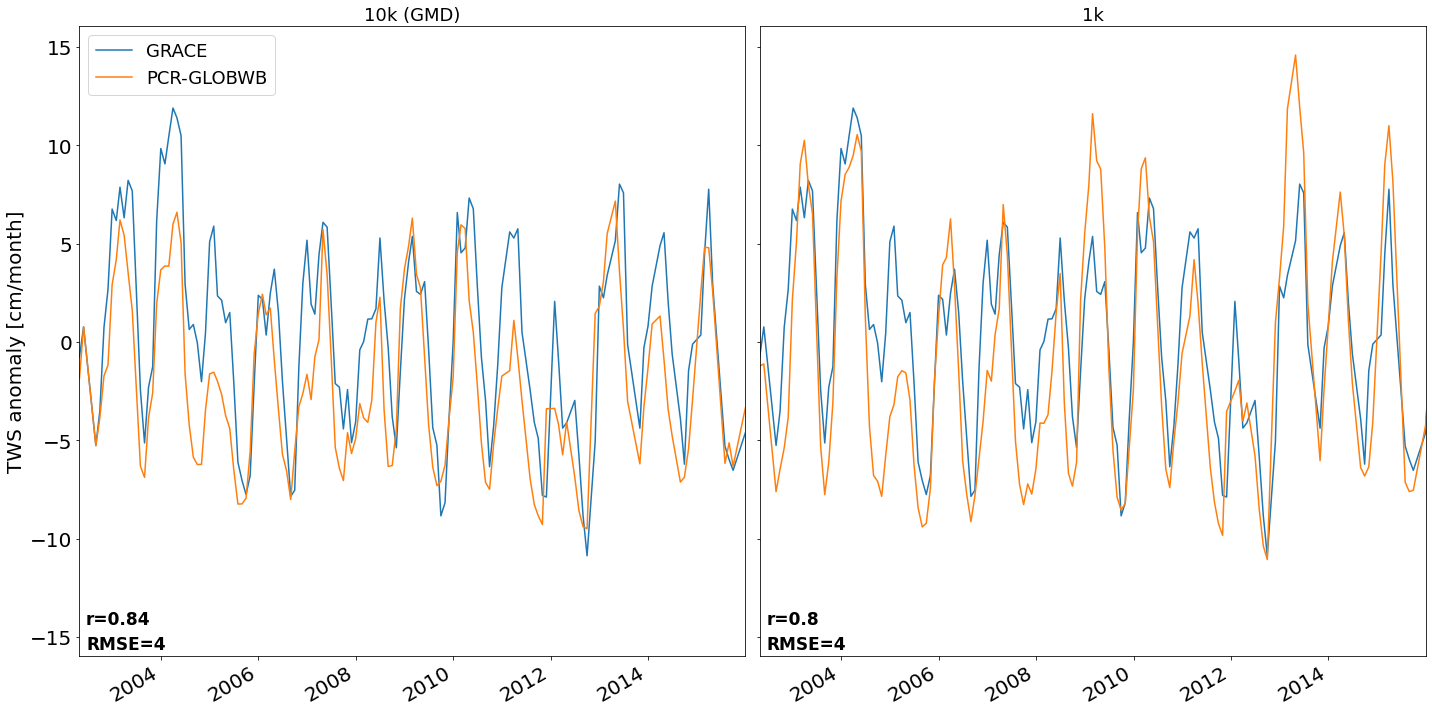

In [23]:
GRACE_10k_GMD_fo = 'output/Ebro/evaluated_timeseries_GRACE_10k_GMD.csv'
GRACE_1k_fo =  'output/Ebro/evaluated_timeseries_GRACE_1k.csv'

GRACE_10k_GMD = pd.read_csv(GRACE_10k_GMD_fo, index_col=0)
GRACE_1k  = pd.read_csv(GRACE_1k_fo, index_col=0)

GRACE_10k_GMD = GRACE_10k_GMD.dropna()
GRACE_1k = GRACE_1k.dropna()

GRACE_10k_GMD.set_index(pd.to_datetime(GRACE_10k_GMD.index), inplace=True)
GRACE_1k.set_index(pd.to_datetime(GRACE_1k.index), inplace=True)

GRACE_10k_GMD = GRACE_10k_GMD.rename(columns={'lwe_thickness':'GRACE', 'total_thickness_of_water_storage': 'PCR-GLOBWB'})

idx_min = min(GRACE_10k_GMD.index.values.min(), GRACE_1k.index.values.min())
idx_max = min(GRACE_10k_GMD.index.values.max(), GRACE_1k.index.values.max())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

GRACE_10k_GMD.plot(ax=ax1)
GRACE_1k.plot(ax=ax2, legend=None)

ax1.set_ylabel('TWS anomaly [cm/month]', fontsize=20)

ax1.legend(loc="upper left", fontsize=18)

ax1.set_title('10k (GMD)', fontsize=18)
ax2.set_title('1k', fontsize=18)

for ax, r, rmse in zip([ax1, ax2], [0.84, 0.80], [4, 4]):
    ax.set_xlim(idx_min, idx_max)
    ax.tick_params(labelsize=20)
    ax.text(0.01, 0.05, 'r={}'.format(r), fontsize=17, fontweight='bold', transform=ax.transAxes)
    ax.text(0.01, 0.01, 'RMSE={}'.format(rmse), fontsize=17, fontweight='bold', transform=ax.transAxes)

plt.tight_layout()

plt.savefig('figs/comparison_Ebro_GRACE.png', dpi=300, bbox_inches='tight')

## GRDC

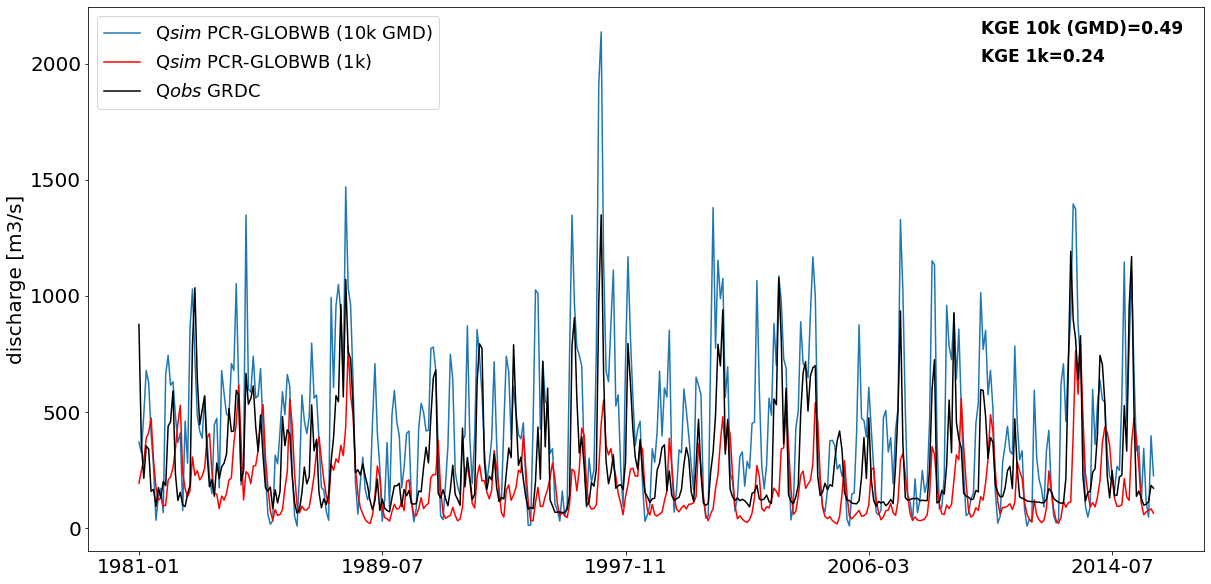

In [24]:
GRDC_10k_GMD_fo = 'output/Ebro/evaluated_timeseries_GRDC_10k_GMD.csv'
GRDC_1k_fo = 'output/Ebro/evaluated_timeseries_GRDC_1k.csv'

GRDC_10k_GMD = pd.read_csv(GRDC_10k_GMD_fo, index_col=0)
GRDC_1k  = pd.read_csv(GRDC_1k_fo, index_col=0)

GRDC_1k = GRDC_1k.rename(columns={'Q$sim$ PCR-GLOBWB (1km)':'Q$sim$ PCR-GLOBWB (1k)'})

GRDC_1k['Q$sim$ PCR-GLOBWB (10k GMD)'] = GRDC_10k_GMD['Q$sim$ PCR-GLOBWB (1km)']

GRDC_1k = GRDC_1k.dropna()

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
GRDC_1k['Q$sim$ PCR-GLOBWB (10k GMD)'].plot(ax=ax, legend=True)
GRDC_1k['Q$sim$ PCR-GLOBWB (1k)'].plot(ax=ax, color='r', legend=True)
GRDC_1k['Q$obs$ GRDC'].plot(ax=ax, color='k', legend=True)

ax.set_ylabel('discharge [m3/s]', fontsize=20)

ax.legend(loc="upper left", fontsize=18)

ax.tick_params(labelsize=20)
    
ax.text(0.8, 0.95, 'KGE 10k (GMD)=0.49'.format(rmse), fontsize=17, fontweight='bold', transform=ax.transAxes)
ax.text(0.8, 0.90, 'KGE 1k=0.24'.format(rmse), fontsize=17, fontweight='bold', transform=ax.transAxes)
    
plt.savefig('figs/comparison_Ebro_GRDC.png', dpi=300, bbox_inches='tight')

<a id='Po'></a>

# Po

## GLEAM

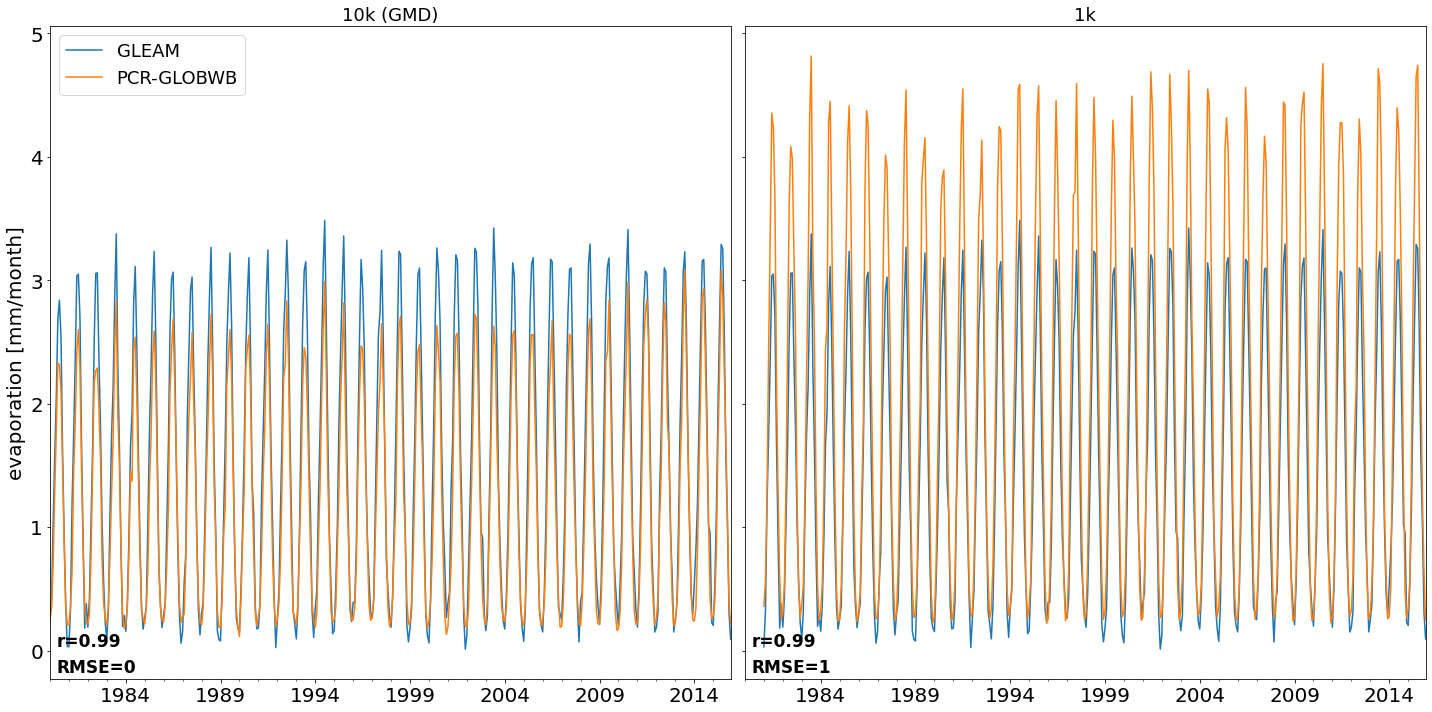

In [25]:
# paths to model output data (includes observations already as well)
GLEAM_10k_GMD_fo = 'output/Po/evaluated_timeseries_GLEAM_10k_GMD.csv'
GLEAM_1k_fo =  'output/Po/evaluated_timeseries_GLEAM_1k.csv'

# load data
GLEAM_10k_GMD = pd.read_csv(GLEAM_10k_GMD_fo, index_col=0)
GLEAM_1k  = pd.read_csv(GLEAM_1k_fo, index_col=0)

# remove missing values
GLEAM_10k_GMD = GLEAM_10k_GMD.dropna()
GLEAM_1k = GLEAM_1k.dropna()

# set index
GLEAM_10k_GMD.set_index(pd.to_datetime(GLEAM_10k_GMD.index), inplace=True)
GLEAM_1k.set_index(pd.to_datetime(GLEAM_1k.index), inplace=True)

# give columns a more meaningful name
GLEAM_10k_GMD = GLEAM_10k_GMD.rename(columns={'E':'GLEAM', 'total_evaporation': 'PCR-GLOBWB'})

# check overall first and last timestep of data
idx_min = min(GLEAM_10k_GMD.index.values.min(), GLEAM_1k.index.values.min())
idx_max = min(GLEAM_10k_GMD.index.values.max(), GLEAM_1k.index.values.max())

#plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

GLEAM_10k_GMD.plot(ax=ax1)
GLEAM_1k.plot(ax=ax2, legend=None)

ax1.legend(loc="upper left", fontsize=18)

ax1.set_title('10k (GMD)', fontsize=18)
ax2.set_title('1k', fontsize=18)

ax1.set_ylabel('evaporation [mm/month]', fontsize=20)

for ax, r, rmse in zip([ax1, ax2], [0.99, 0.99], [0, 1]):
    ax.set_xlim(idx_min, idx_max)
    ax.tick_params(labelsize=20)
    ax.text(0.01, 0.05, 'r={}'.format(r), fontsize=17, fontweight='bold', transform=ax.transAxes)
    ax.text(0.01, 0.01, 'RMSE={}'.format(rmse), fontsize=17, fontweight='bold', transform=ax.transAxes)

plt.tight_layout()

plt.savefig('figs/comparison_Po_GLEAM.png', dpi=300, bbox_inches='tight')

## GRACE

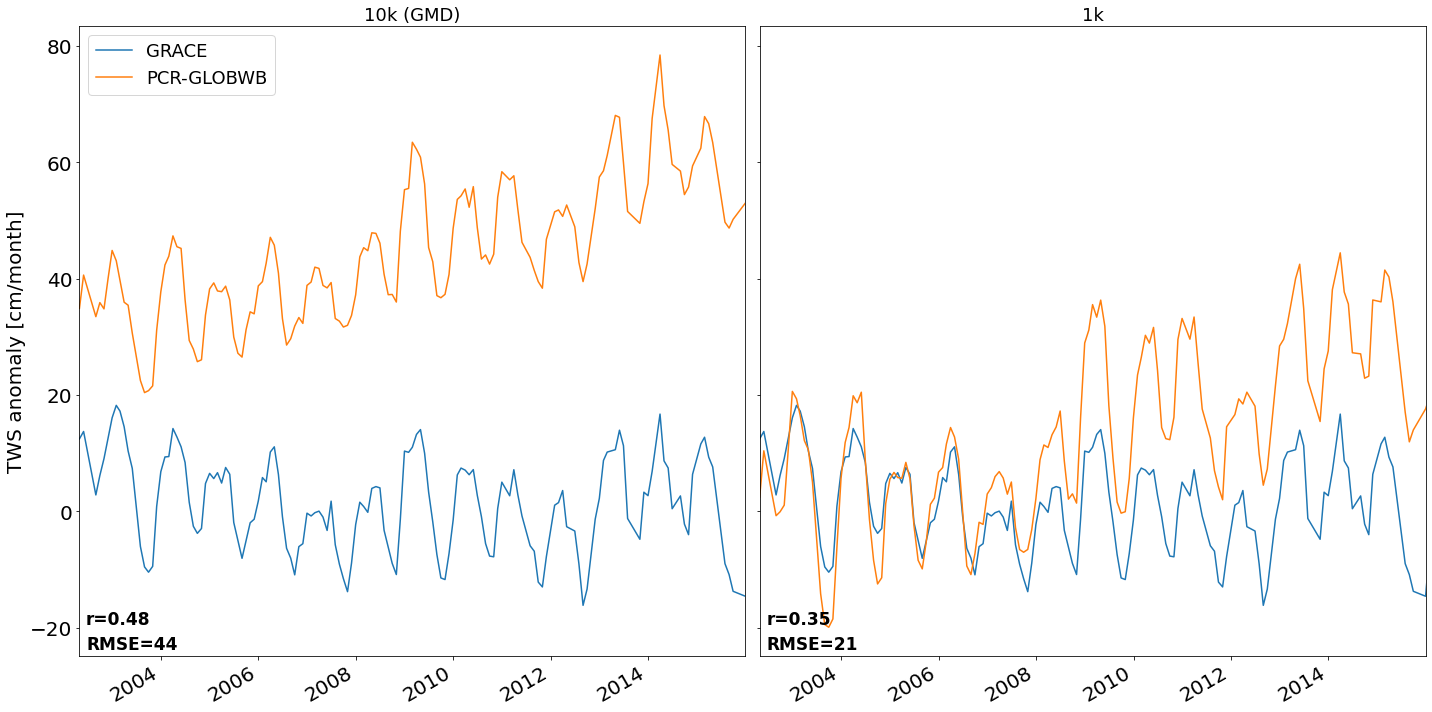

In [26]:
GRACE_10k_GMD_fo = 'output/Po/evaluated_timeseries_GRACE_10k_GMD.csv'
GRACE_1k_fo =  'output/Po/evaluated_timeseries_GRACE_1k.csv'

GRACE_10k_GMD = pd.read_csv(GRACE_10k_GMD_fo, index_col=0)
GRACE_1k  = pd.read_csv(GRACE_1k_fo, index_col=0)

GRACE_10k_GMD = GRACE_10k_GMD.dropna()
GRACE_1k = GRACE_1k.dropna()

GRACE_10k_GMD.set_index(pd.to_datetime(GRACE_10k_GMD.index), inplace=True)
GRACE_1k.set_index(pd.to_datetime(GRACE_1k.index), inplace=True)

GRACE_10k_GMD = GRACE_10k_GMD.rename(columns={'lwe_thickness':'GRACE', 'total_thickness_of_water_storage': 'PCR-GLOBWB'})

idx_min = min(GRACE_10k_GMD.index.values.min(), GRACE_1k.index.values.min())
idx_max = min(GRACE_10k_GMD.index.values.max(), GRACE_1k.index.values.max())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

GRACE_10k_GMD.plot(ax=ax1)
GRACE_1k.plot(ax=ax2, legend=None)

ax1.set_ylabel('TWS anomaly [cm/month]', fontsize=20)

ax1.legend(loc="upper left", fontsize=18)

ax1.set_title('10k (GMD)', fontsize=18)
ax2.set_title('1k', fontsize=18)

for ax, r, rmse in zip([ax1, ax2], [0.48, 0.35], [44, 21]):
    ax.set_xlim(idx_min, idx_max)
    ax.tick_params(labelsize=20)
    ax.text(0.01, 0.05, 'r={}'.format(r), fontsize=17, fontweight='bold', transform=ax.transAxes)
    ax.text(0.01, 0.01, 'RMSE={}'.format(rmse), fontsize=17, fontweight='bold', transform=ax.transAxes)

plt.tight_layout()

plt.savefig('figs/comparison_Po_GRACE.png', dpi=300, bbox_inches='tight')

## GRDC

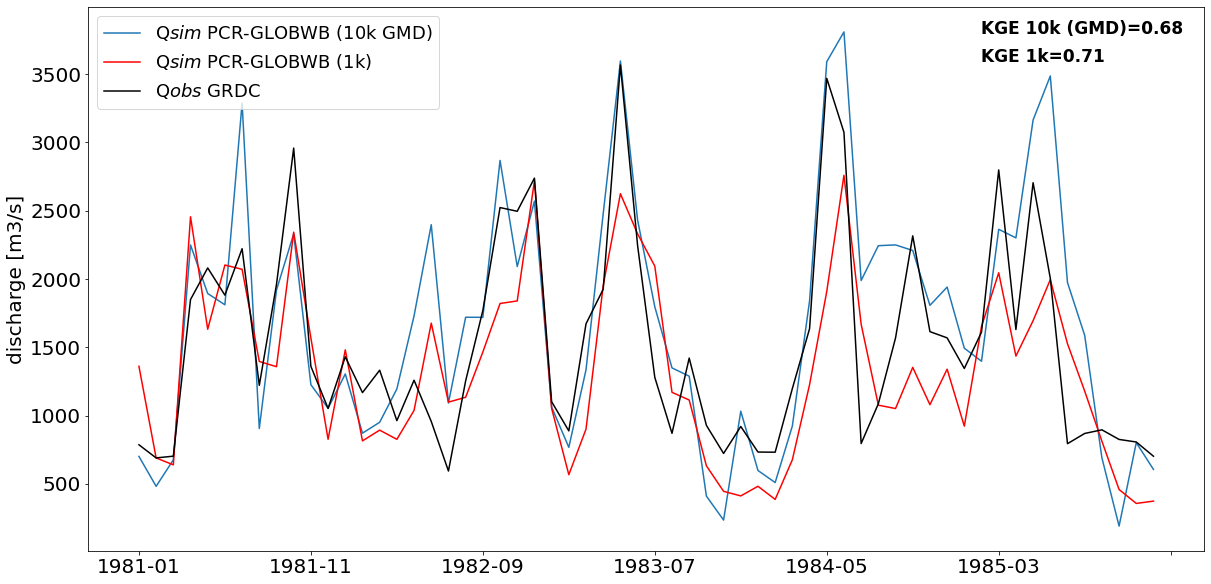

In [27]:
GRDC_10k_GMD_fo = 'output/Po/evaluated_timeseries_GRDC_10k_GMD.csv'
GRDC_1k_fo = 'output/Po/evaluated_timeseries_GRDC_1k.csv'

GRDC_10k_GMD = pd.read_csv(GRDC_10k_GMD_fo, index_col=0)
GRDC_1k  = pd.read_csv(GRDC_1k_fo, index_col=0)

GRDC_1k = GRDC_1k.rename(columns={'Q$sim$ PCR-GLOBWB (1km)':'Q$sim$ PCR-GLOBWB (1k)'})

GRDC_1k['Q$sim$ PCR-GLOBWB (10k GMD)'] = GRDC_10k_GMD['Q$sim$ PCR-GLOBWB (1km)']

GRDC_1k = GRDC_1k.dropna()

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
GRDC_1k['Q$sim$ PCR-GLOBWB (10k GMD)'].plot(ax=ax, legend=True)
GRDC_1k['Q$sim$ PCR-GLOBWB (1k)'].plot(ax=ax, color='r', legend=True)
GRDC_1k['Q$obs$ GRDC'].plot(ax=ax, color='k', legend=True)

ax.set_ylabel('discharge [m3/s]', fontsize=20)

ax.legend(loc="upper left", fontsize=18)

ax.tick_params(labelsize=20)
    
ax.text(0.8, 0.95, 'KGE 10k (GMD)=0.68'.format(rmse), fontsize=17, fontweight='bold', transform=ax.transAxes)
ax.text(0.8, 0.90, 'KGE 1k=0.71'.format(rmse), fontsize=17, fontweight='bold', transform=ax.transAxes)
    
plt.savefig('figs/comparison_Po_GRDC.png', dpi=300, bbox_inches='tight')

<a id='Dnieper'></a>

# Dnieper

## GLEAM

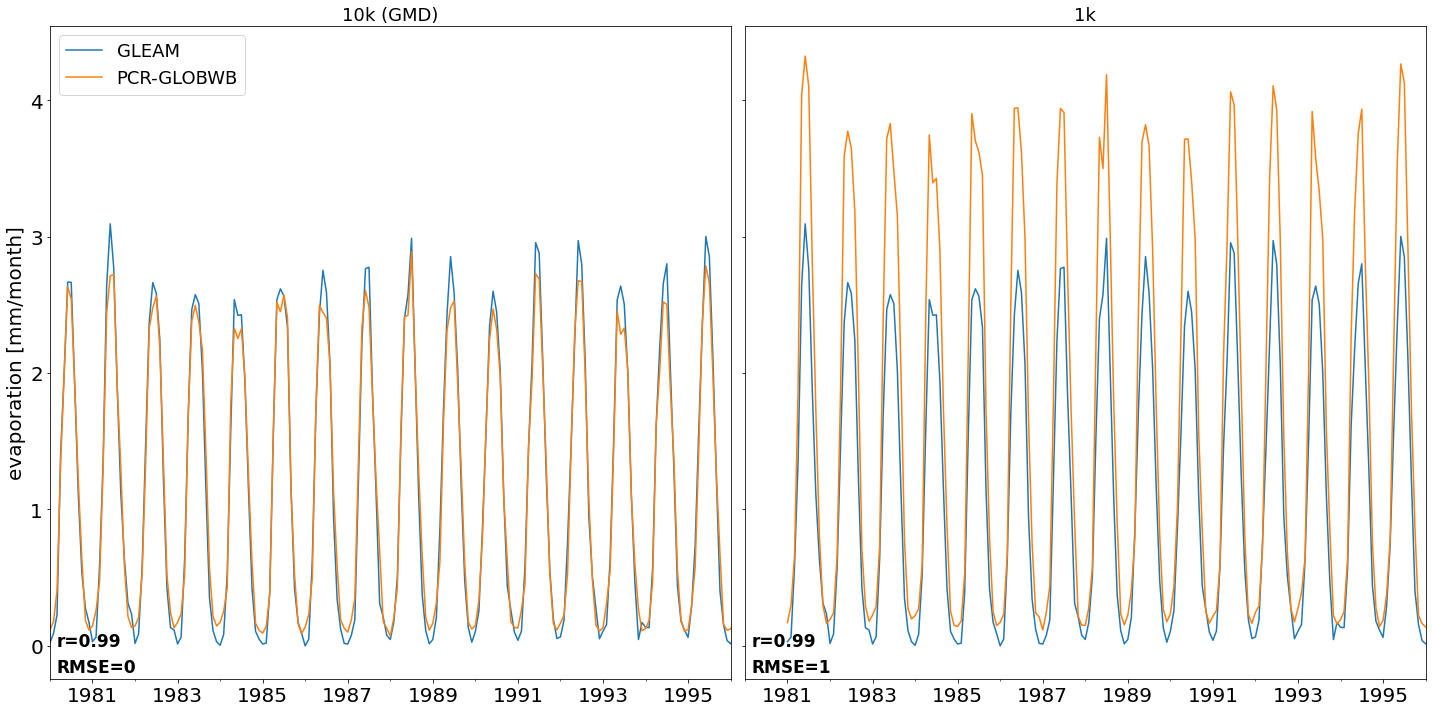

In [28]:
# paths to model output data (includes observations already as well)
GLEAM_10k_GMD_fo = 'output/Dnieper/evaluated_timeseries_GLEAM_10k_GMD.csv'
GLEAM_1k_fo =  'output/Dnieper/evaluated_timeseries_GLEAM_1k.csv'

# load data
GLEAM_10k_GMD = pd.read_csv(GLEAM_10k_GMD_fo, index_col=0)
GLEAM_1k  = pd.read_csv(GLEAM_1k_fo, index_col=0)

# remove missing values
GLEAM_10k_GMD = GLEAM_10k_GMD.dropna()
GLEAM_1k = GLEAM_1k.dropna()

# set index
GLEAM_10k_GMD.set_index(pd.to_datetime(GLEAM_10k_GMD.index), inplace=True)
GLEAM_1k.set_index(pd.to_datetime(GLEAM_1k.index), inplace=True)

# give columns a more meaningful name
GLEAM_10k_GMD = GLEAM_10k_GMD.rename(columns={'E':'GLEAM', 'total_evaporation': 'PCR-GLOBWB'})

# check overall first and last timestep of data
idx_min = min(GLEAM_10k_GMD.index.values.min(), GLEAM_1k.index.values.min())
idx_max = min(GLEAM_10k_GMD.index.values.max(), GLEAM_1k.index.values.max())

#plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

GLEAM_10k_GMD.plot(ax=ax1)
GLEAM_1k.plot(ax=ax2, legend=None)

ax1.legend(loc="upper left", fontsize=18)

ax1.set_title('10k (GMD)', fontsize=18)
ax2.set_title('1k', fontsize=18)

ax1.set_ylabel('evaporation [mm/month]', fontsize=20)

for ax, r, rmse in zip([ax1, ax2], [0.99, 0.99], [0, 1]):
    ax.set_xlim(idx_min, idx_max)
    ax.tick_params(labelsize=20)
    ax.text(0.01, 0.05, 'r={}'.format(r), fontsize=17, fontweight='bold', transform=ax.transAxes)
    ax.text(0.01, 0.01, 'RMSE={}'.format(rmse), fontsize=17, fontweight='bold', transform=ax.transAxes)

plt.tight_layout()

plt.savefig('figs/comparison_Dnieper_GLEAM.png', dpi=300, bbox_inches='tight')

## GRACE

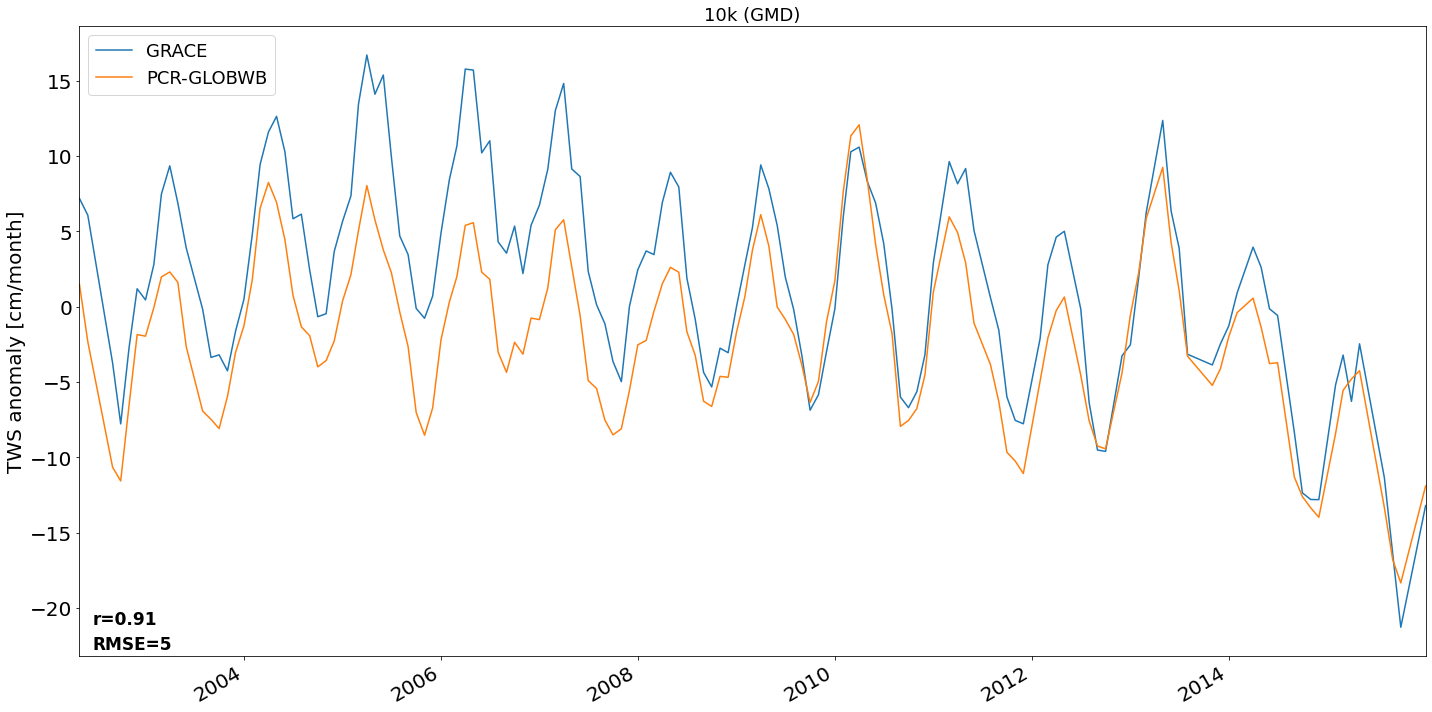

In [29]:
GRACE_10k_GMD_fo = 'output/Dnieper/evaluated_timeseries_GRACE_10k_GMD.csv'

GRACE_10k_GMD = pd.read_csv(GRACE_10k_GMD_fo, index_col=0)

GRACE_10k_GMD = GRACE_10k_GMD.dropna()

GRACE_10k_GMD.set_index(pd.to_datetime(GRACE_10k_GMD.index), inplace=True)

GRACE_10k_GMD = GRACE_10k_GMD.rename(columns={'lwe_thickness':'GRACE', 'total_thickness_of_water_storage': 'PCR-GLOBWB'})

idx_min = GRACE_10k_GMD.index.values.min()
idx_max = GRACE_10k_GMD.index.values.max()

fig, (ax1) = plt.subplots(1, 1, figsize=(20, 10), sharey=True)

GRACE_10k_GMD.plot(ax=ax1)

ax1.set_ylabel('TWS anomaly [cm/month]', fontsize=20)

ax1.legend(loc="upper left", fontsize=18)

ax1.set_title('10k (GMD)', fontsize=18)

for ax, r, rmse in zip([ax1], [0.91], [5]):
    ax.set_xlim(idx_min, idx_max)
    ax.tick_params(labelsize=20)
    ax.text(0.01, 0.05, 'r={}'.format(r), fontsize=17, fontweight='bold', transform=ax.transAxes)
    ax.text(0.01, 0.01, 'RMSE={}'.format(rmse), fontsize=17, fontweight='bold', transform=ax.transAxes)

plt.tight_layout()

plt.savefig('figs/comparison_Dnieper_GRACE.png', dpi=300, bbox_inches='tight')

## GRDC

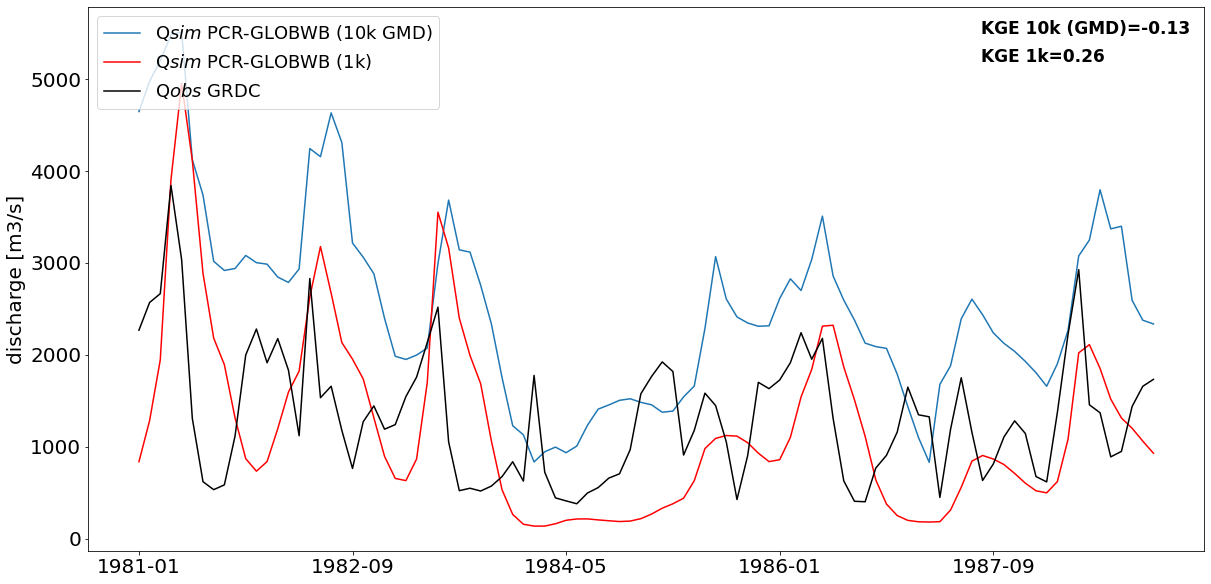

In [30]:
GRDC_10k_GMD_fo = 'output/Dnieper/evaluated_timeseries_GRDC_10k_GMD.csv'
GRDC_1k_fo = 'output/Dnieper/evaluated_timeseries_GRDC_1k.csv'

GRDC_10k_GMD = pd.read_csv(GRDC_10k_GMD_fo, index_col=0)
GRDC_1k  = pd.read_csv(GRDC_1k_fo, index_col=0)

GRDC_1k = GRDC_1k.rename(columns={'Q$sim$ PCR-GLOBWB (1km)':'Q$sim$ PCR-GLOBWB (1k)'})

GRDC_1k['Q$sim$ PCR-GLOBWB (10k GMD)'] = GRDC_10k_GMD['Q$sim$ PCR-GLOBWB (1km)']

GRDC_1k = GRDC_1k.dropna()

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
GRDC_1k['Q$sim$ PCR-GLOBWB (10k GMD)'].plot(ax=ax, legend=True)
GRDC_1k['Q$sim$ PCR-GLOBWB (1k)'].plot(ax=ax, color='r', legend=True)
GRDC_1k['Q$obs$ GRDC'].plot(ax=ax, color='k', legend=True)

ax.set_ylabel('discharge [m3/s]', fontsize=20)

ax.legend(loc="upper left", fontsize=18)

ax.tick_params(labelsize=20)
    
ax.text(0.8, 0.95, 'KGE 10k (GMD)=-0.13'.format(rmse), fontsize=17, fontweight='bold', transform=ax.transAxes)
ax.text(0.8, 0.90, 'KGE 1k=0.26'.format(rmse), fontsize=17, fontweight='bold', transform=ax.transAxes)
    
plt.savefig('figs/comparison_Dnieper_GRDC.png', dpi=300, bbox_inches='tight')